In [190]:
df.index.min() Timestamp('2002-06-28 00:00:00') Timestamp('2023-09-29 00:00:00')

Timestamp('2002-06-28 00:00:00')

In [191]:
df.index.max()

Timestamp('2023-09-29 00:00:00')

### Studied Variable : 
2. **SP50_L**:  refers to the S&P 500 index level, a market-capitalization-weighted index of 500 of the largest publicly traded companies in the U.S., used as a benchmark
### Explanatory Variables : 
 for stock market performance.

3. **VIX_L**: Refers to the level of the CBOE Volatility Index (VIX), known as the market's "fear gauge". It measures the stock market's expectation of volatility based on S&P 500 index options.

4. **RUSSEL_L**: Likely refers to the Russell Index level, possibly the Russell 2000 or 3000, which measures the performance of the smallest 2000 (or 3000 for the Russell 3000) companies in the Russell 3000 Index.

5. **US CPI Q %**: The quarterly percentage change in the Consumer Price Index for the United States, measuring inflation by tracking changes in the price level of a basket of consumer goods and services.

6. **US wholesale Q%**: Quarterly percentage change in wholesale prices in the US, indicating trends in the producer price index which can influence inflation.

7. **US_LT_INT**: United States Long-Term Interest Rate, typically referring to the yield on 10-year Treasury bonds, indicating long-term borrowing costs.

8. **US_SR_INT**: United States Short-Term Interest Rate, often reflecting yields on treasury bills or other short-term government securities, indicating short-term borrowing costs.

9. **US_UNEMP_L**: The level of unemployment in the United States, typically expressed as a percentage of the total labor force that is jobless and actively seeking employment.

10. **US_INDPROD_C**: United States Industrial Production Change, the percentage change in the output of the nation's factories, mines, and utilities, indicating the health of the manufacturing sector.

11. **US_HSTART_C**: United States Housing Starts Change, the percentage change in the annualized number of new residential construction projects begun during a particular period.

12. **US_BUD_BAL_PCT_GDP**: The United States Budget Balance as a percentage of GDP, measuring the fiscal balance of the federal government's budget.

13. **US_DEBT_L**: United States Debt Level, the total amount of money that the federal government owes to creditors.

14. **US_EXP_L**: United States Exports Level, the total value of goods and services sold by the U.S. to other countries.

15. **US_IMP_L**: United States Imports Level, the total value of goods and services purchased by the U.S. from other countries.

16. **US_RTL_IND_L**: United States Retail Industry Level, potentially referring to retail sales, which measure the total receipts at stores that sell merchandise to the public.

17. **US_FX_RS_L**: Likely refers to United States Foreign Exchange Reserves Level, the total of a country's gold holdings and convertible foreign currencies held in its central bank.

18. **US_HS_STARTS_L**: United States Housing Starts Level, the number of new residential construction projects that have begun during a particular period.

19. **Bentoil_L**: Likely a typo or abbreviation for Brent Oil Level, referring to the price level of Brent crude oil, a major trading classification of sweet light crude oil.

20. **NDAQ_L**: Refers to the NASDAQ Composite Index level, a stock market index of the stocks listed on the NASDAQ stock exchange, including technology and biotech sectors.


In [54]:
df = pd.read_excel('DATASET.xlsx')
df.columns

Index(['Date', 'SP50_L', 'VIX_L', 'RUSSEL_L', 'US CPI Q %', 'US wholesale Q%',
       'US_LT_INT', 'US_SR_INT', 'US_UNEMP_L', 'US_RT_IND_C', 'US_INDPROD_C',
       'US_HSTART_C', 'US_EXP_C', 'US_IMP_C', 'US_BUD_BAL_PCT_GDP',
       'US_DEBT_L', 'US_DEBT_C', 'US_EXP_L', 'US_IMP_L', 'US_RTL_IND_L',
       'US_FX_RS_L', 'US_HS_STARTS_L', 'Bentoil_L', 'NDAQ_L'],
      dtype='object')

In [132]:
import pandas as pd 
import numpy as np  
import numpy as np
import pandas as pd
from statsmodels.discrete.discrete_model import Probit
from statsmodels.tools.tools import add_constant
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
df = pd.read_excel('DATASET.xlsx')
df
selected_columns  = ['Date', 'SP50_L', 'VIX_L', 'RUSSEL_L', 'US CPI Q %', 'US wholesale Q%',
       'US_LT_INT', 'US_SR_INT', 'US_UNEMP_L', 'US_INDPROD_C',
       'US_HSTART_C', 'US_BUD_BAL_PCT_GDP',
       'US_DEBT_L',  'US_EXP_L', 'US_IMP_L', 'US_RTL_IND_L',
       'US_FX_RS_L', 'US_HS_STARTS_L', 'Bentoil_L', 'NDAQ_L']

df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
df=df[selected_columns].dropna().sort_values(by='Date', ascending =True)


In [120]:



df= df.dropna()
df= df.drop(['Date' ], axis=1)

# Define predictors - using lagged variables
predictor_cols = [col for col in df.columns if 'lag1' in col]

# Add a constant term to the predictors for the intercept
X = add_constant(df[predictor_cols])

# The response variable
y = df['Target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Fit a Probit model
probit_model = Probit(y_train.values, X_train.values).fit()

# Print model summary
print(probit_model.summary())

# Predict probabilities
y_pred_prob = probit_model.predict(X_test)

# Convert probabilities to 0/1 binary outcome
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')

Optimization terminated successfully.
         Current function value: 0.633431
         Iterations 4
                          Probit Regression Results                           
Dep. Variable:                      y   No. Observations:                   76
Model:                         Probit   Df Residuals:                       75
Method:                           MLE   Df Model:                            0
Date:                Tue, 26 Mar 2024   Pseudo R-squ.:               3.923e-11
Time:                        11:19:31   Log-Likelihood:                -48.141
converged:                       True   LL-Null:                       -48.141
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4428      0.149      2.972      0.003       0.151       0.735
Accuracy: 0.2222222222222222


In [72]:
lagged_columns = [ 'US CPI Q %', 'US wholesale Q%',
                  'US_LT_INT', 'US_SR_INT', 'US_UNEMP_L', 'US_INDPROD_C', 'US_HSTART_C',
                  'US_BUD_BAL_PCT_GDP']
for column in lagged_columns:
    df[f'{column}_lag1'] = df[column].shift(1)

# Dropping the rows with NaN values after shifting
df.dropna(inplace=True)
# Selecting the predictor columns (lagged predictors + lagged binary_response)
predictor_columns = [f'{column}_lag1' for column in lagged_columns] 

# The Probit model requires an intercept term, which we add here
X = add_constant(df[predictor_columns])

# Defining the response variable
y = df['Target']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the Probit model
probit_model = Probit(y_train, X_train).fit()

# Output the summary of the model
print(probit_model.summary())

# Making predictions using the test set
y_pred_prob = probit_model.predict(X_test)

# Converting probabilities to 0/1 binary outcome using 0.5 as a threshold
y_pred = (y_pred_prob > 0.6).astype(int)

# Evaluating the model using accuracy score and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Printing the evaluation results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')

Optimization terminated successfully.
         Current function value: 0.521425
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:                 Target   No. Observations:                   65
Model:                         Probit   Df Residuals:                       56
Method:                           MLE   Df Model:                            8
Date:                Tue, 26 Mar 2024   Pseudo R-squ.:                  0.1853
Time:                        02:50:16   Log-Likelihood:                -33.893
converged:                       True   LL-Null:                       -41.601
Covariance Type:            nonrobust   LLR p-value:                   0.05154
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0396      0.987     -0.040      0.968      -1.975   

In [75]:
df.columns

Index(['SP50_L', 'VIX_L', 'RUSSEL_L', 'US CPI Q %', 'US wholesale Q%',
       'US_LT_INT', 'US_SR_INT', 'US_UNEMP_L', 'US_INDPROD_C', 'US_HSTART_C',
       'US_BUD_BAL_PCT_GDP', 'US_DEBT_L', 'US_EXP_L', 'US_IMP_L',
       'US_RTL_IND_L', 'US_FX_RS_L', 'US_HS_STARTS_L', 'Bentoil_L', 'NDAQ_L',
       'log_SPX', 'log_VIX_L', 'log_RUSSEL_L', 'SPX_returns', 'VIX_returns',
       'RUSSEL_returns', 'Excess_SPX_returns', 'Excess_VIX_returns',
       'Excess_RUSSEL_returns', 'Target'],
      dtype='object')

In [109]:
import optuna
from statsmodels.discrete.discrete_model import Probit, Logit
from statsmodels.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
import pandas as pd

# Assuming 'df' is your DataFrame and 'Target' is your target column

def optimize_model(trial):
    lagged_columns = [
        'US CPI Q %', 'US wholesale Q%', 'US_LT_INT', 'US_SR_INT', 'US_UNEMP_L',
        'US_INDPROD_C', 'US_HSTART_C', 'US_BUD_BAL_PCT_GDP', 'US_DEBT_L', 'US_EXP_L',
        'US_IMP_L', 'US_RTL_IND_L', 'US_FX_RS_L', 'US_HS_STARTS_L', 'Bentoil_L'
    ]
    
    # Choose the model type
    model_type = trial.suggest_categorical('model_type', ['Probit', 'Logit'])
    
    temp_df = df.copy()
    for column in lagged_columns:
        lag = trial.suggest_int(f'{column}_lag', 1, 10)
        temp_df[f'{column}_lag{lag}'] = temp_df[column].shift(lag)
    
    temp_df.dropna(inplace=True)
    
    predictor_columns = [col for col in temp_df.columns if 'lag' in col]
    X = add_constant(temp_df[predictor_columns])
    y = temp_df['Target']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Fit the chosen model
    if model_type == 'Probit':
        model = Probit(y_train, X_train).fit(disp=0)
    elif model_type == 'Logit':
        model = Logit(y_train, X_train).fit(disp=0)
    
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.6).astype(int)
    
    recall = recall_score(y_test, y_pred)
    
    return recall

study = optuna.create_study(direction='maximize')
study.optimize(optimize_model, n_trials=100)

print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)


[I 2024-03-26 03:21:16,543] A new study created in memory with name: no-name-9597a98e-8f7e-41c7-8abd-dd48fcc308dc
[I 2024-03-26 03:21:16,614] Trial 0 finished with value: 0.6666666666666666 and parameters: {'model_type': 'Probit', 'US CPI Q %_lag': 4, 'US wholesale Q%_lag': 5, 'US_LT_INT_lag': 8, 'US_SR_INT_lag': 8, 'US_UNEMP_L_lag': 4, 'US_INDPROD_C_lag': 10, 'US_HSTART_C_lag': 4, 'US_BUD_BAL_PCT_GDP_lag': 1, 'US_DEBT_L_lag': 2, 'US_EXP_L_lag': 5, 'US_IMP_L_lag': 8, 'US_RTL_IND_L_lag': 1, 'US_FX_RS_L_lag': 7, 'US_HS_STARTS_L_lag': 6, 'Bentoil_L_lag': 7}. Best is trial 0 with value: 0.6666666666666666.
[I 2024-03-26 03:21:16,664] Trial 1 finished with value: 0.6666666666666666 and parameters: {'model_type': 'Probit', 'US CPI Q %_lag': 10, 'US wholesale Q%_lag': 9, 'US_LT_INT_lag': 7, 'US_SR_INT_lag': 6, 'US_UNEMP_L_lag': 9, 'US_INDPROD_C_lag': 6, 'US_HSTART_C_lag': 8, 'US_BUD_BAL_PCT_GDP_lag': 4, 'US_DEBT_L_lag': 8, 'US_EXP_L_lag': 10, 'US_IMP_L_lag': 7, 'US_RTL_IND_L_lag': 10, 'US_FX_

Number of finished trials: 100
Best trial: {'model_type': 'Probit', 'US CPI Q %_lag': 2, 'US wholesale Q%_lag': 6, 'US_LT_INT_lag': 1, 'US_SR_INT_lag': 8, 'US_UNEMP_L_lag': 1, 'US_INDPROD_C_lag': 6, 'US_HSTART_C_lag': 10, 'US_BUD_BAL_PCT_GDP_lag': 4, 'US_DEBT_L_lag': 4, 'US_EXP_L_lag': 6, 'US_IMP_L_lag': 5, 'US_RTL_IND_L_lag': 2, 'US_FX_RS_L_lag': 6, 'US_HS_STARTS_L_lag': 1, 'Bentoil_L_lag': 5}


In [114]:
# Assuming `study.best_trial.params` gives the optimal lag values

best_lags = study.best_trial.params
print("Best lags:", best_lags)

# Creating a new DataFrame to apply the best lag values
best_df = df.copy()

# Applying the optimal lags for each predictor
for column in lagged_columns:
    lag = best_lags[f'{column}_lag']
    best_df[f'{column}_lag{lag}'] = best_df[column].shift(lag)

best_df.dropna(inplace=True)

# Selecting the new set of predictor columns
predictor_columns = [col for col in best_df.columns if 'lag' in col]

X = add_constant(best_df[predictor_columns])
y = best_df['Target']

# Splitting the dataset - You might want to use the same split or a different one for the final test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Fitting the Probit model with the best lag configuration
best_model = Probit(y_train, X_train).fit(disp=0)  # Suppressing output with disp=0

# Making predictions on the test set using the best model
y_pred_prob = best_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Adjust threshold as necessary

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy of the best model: {accuracy}')
print(f'Confusion Matrix of the best model:\n{conf_matrix}')


Best lags: {'model_type': 'Probit', 'US CPI Q %_lag': 2, 'US wholesale Q%_lag': 6, 'US_LT_INT_lag': 1, 'US_SR_INT_lag': 8, 'US_UNEMP_L_lag': 1, 'US_INDPROD_C_lag': 6, 'US_HSTART_C_lag': 10, 'US_BUD_BAL_PCT_GDP_lag': 4, 'US_DEBT_L_lag': 4, 'US_EXP_L_lag': 6, 'US_IMP_L_lag': 5, 'US_RTL_IND_L_lag': 2, 'US_FX_RS_L_lag': 6, 'US_HS_STARTS_L_lag': 1, 'Bentoil_L_lag': 5}
Accuracy of the best model: 0.92
Confusion Matrix of the best model:
[[ 7  1]
 [ 1 16]]


In [115]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Assuming 'X' and 'y' are defined, and 'X' already includes an intercept
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = sm.Logit(y_train, X_train).fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.527556
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                   60
Model:                          Logit   Df Residuals:                       51
Method:                           MLE   Df Model:                            8
Date:                Tue, 26 Mar 2024   Pseudo R-squ.:                  0.2075
Time:                        11:16:36   Log-Likelihood:                -31.653
converged:                       True   LL-Null:                       -39.940
Covariance Type:            nonrobust   LLR p-value:                   0.03486
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       2.7021      1.646      1.641      0.101      -0.525   

In [117]:
# Fit the model
clf = LogisticRegression().fit(X_train, y_train)

# Predict probabilities
y_pred_prob = clf.predict_proba(X_test)[:,1]

# Convert probabilities to binary outcome using a threshold, e.g., 0.5
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate accuracy and recall
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy: {accuracy}, Recall: {recall}')


Accuracy: 0.8, Recall: 0.8888888888888888


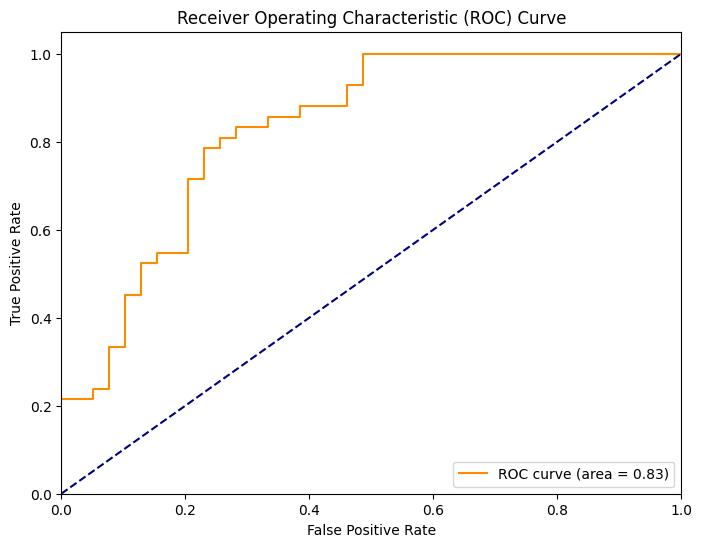

In [181]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Interpolate weekly 

In [161]:
import pandas as pd

# Assuming `df` is your DataFrame and it's already loaded and pre-processed

# First, ensure the 'Date' column is in a datetime format if not already
#df['Date'] = pd.to_datetime(df['Date'], format='%Y%m')

# Set 'Date' as the index
#df.set_index('Date', inplace=True)

# Resample to weekly frequency, choosing an appropriate aggregation method for non-numeric columns if necessary
# For numeric columns, we can interpolate the values after resampling
df_weekly = df.resample('M').mean()  # This creates NaNs for weeks without data

# Interpolate missing values
df_weekly_interpolated = df_weekly.interpolate(method='linear')  # Linear interpolation

# Check the result
df_weekly_interpolated

C:\Users\zgcha\AppData\Local\Temp\ipykernel_3952\2511207600.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_weekly = df.resample('M').mean()  # This creates NaNs for weeks without data


,SP50_L,VIX_L,RUSSEL_L,US CPI Q %,US wholesale Q%,US_LT_INT,US_SR_INT,US_UNEMP_L,US_INDPROD_C,US_HSTART_C,US_BUD_BAL_PCT_GDP,US_DEBT_L,US_EXP_L,US_IMP_L,US_RTL_IND_L,US_FX_RS_L,US_HS_STARTS_L,Bentoil_L,NDAQ_L
Date,,,,,,,,,,,,,,,,,,,
2002-06-30,989.814330,25.400000,1149.832197,0.786210,0.337754,5.106093,1.746250,5.800000,1.544309,-1.857226,-5.253411,6153.295000,699.648000,1160.860000,84.489365,63.652252,1.691000e+06,25.330000,3.116667
2002-07-31,931.637777,30.163333,1066.705706,0.703690,0.273257,4.828177,1.722083,5.766667,1.235215,-1.113306,-5.296125,6187.331767,702.353333,1168.949333,84.841850,64.040851,1.693111e+06,26.590000,3.188889
2002-08-31,873.461223,34.926667,983.579216,0.621169,0.208760,4.550260,1.697917,5.733333,0.926121,-0.369386,-5.338839,6221.368533,705.058667,1177.038667,85.194335,64.429451,1.695222e+06,27.850000,3.261111
2002-09-30,815.284670,39.690000,900.452725,0.538649,0.144263,4.272344,1.673750,5.700000,0.617027,0.374534,-5.381554,6255.405300,707.764000,1185.128000,85.546820,64.818050,1.697333e+06,29.110000,3.333334
2002-10-31,836.796147,36.000000,917.666634,0.556154,0.352277,4.181459,1.571511,5.733333,0.394245,0.884671,-5.568154,6314.597333,703.402667,1193.338667,85.655790,65.866173,1.708111e+06,29.446667,2.994445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31,4336.691689,15.293333,4622.528496,0.760266,-0.973799,3.613458,5.026948,3.500000,0.091620,2.621538,-7.553421,32060.822667,1993.442333,3085.963733,195.055833,233.961140,1.428222e+06,76.070000,49.010000
2023-06-30,4450.381312,13.590000,4693.979632,0.670480,-1.533278,3.595952,5.182264,3.500000,0.168732,4.643882,-7.711072,32352.143000,1954.108000,3064.682900,195.032040,232.967290,1.449667e+06,74.510000,48.590000
2023-07-31,4396.272249,14.900000,4608.129264,0.741655,-0.436261,3.779209,5.266084,3.566667,0.320581,1.018817,-7.711072,32630.396000,1980.475667,3069.323500,196.050977,231.961260,1.419556e+06,81.626667,48.256667


In [162]:
df = df.copy()
df_weekly_interpolated['log_SPX'] = np.log(df_weekly_interpolated['SP50_L'])
df_weekly_interpolated['log_VIX_L'] = np.log(df_weekly_interpolated['VIX_L'])
df_weekly_interpolated['log_RUSSEL_L'] = np.log(df_weekly_interpolated['RUSSEL_L'])

df_weekly_interpolated['SPX_returns'] = df_weekly_interpolated['log_SPX'].diff()
df_weekly_interpolated['VIX_returns'] = df_weekly_interpolated['log_VIX_L'].diff()
df_weekly_interpolated['RUSSEL_returns'] = df_weekly_interpolated['log_RUSSEL_L'].diff()
df_weekly_interpolated['US_SR_INT'] = df_weekly_interpolated.US_SR_INT.div(100)

df_weekly_interpolated['Excess_SPX_returns'] = df_weekly_interpolated['SPX_returns'] - df_weekly_interpolated['US_SR_INT']
df_weekly_interpolated['Excess_VIX_returns'] = df_weekly_interpolated['VIX_returns'] - df_weekly_interpolated['US_SR_INT']
df_weekly_interpolated['Excess_RUSSEL_returns'] = df_weekly_interpolated['RUSSEL_returns'] - df_weekly_interpolated['US_SR_INT']

df_weekly_interpolated['Target'] = np.where(df_weekly_interpolated['Excess_SPX_returns'] > 0 , 1, 0 ) 

<AxesSubplot:>

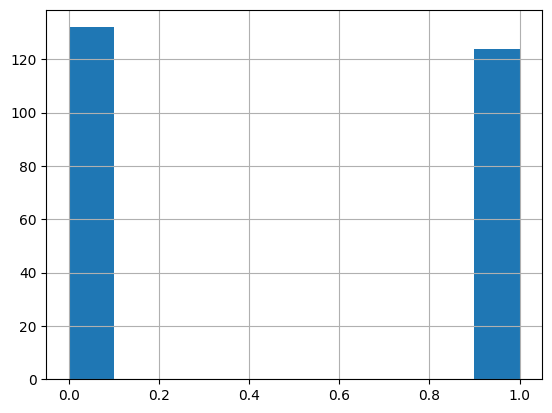

In [163]:
df_weekly_interpolated.Target.hist()

In [164]:



df_weekly_interpolated_train = df_weekly_interpolated.dropna().reset_index()
df_weekly_interpolated_train= df_weekly_interpolated_train.drop(['Date' ], axis=1)

# Define predictors - using lagged variables
predictor_cols = [col for col in df_weekly_interpolated_train.columns if 'lag1' in col]

# Add a constant term to the predictors for the intercept
X = add_constant(df_weekly_interpolated_train[predictor_cols])

# The response variable
y = df_weekly_interpolated_train['Target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Probit model
probit_model = Probit(y_train.values, X_train.values).fit()

# Print model summary
print(probit_model.summary())

# Predict probabilities
y_pred_prob = probit_model.predict(X_test)

# Convert probabilities to 0/1 binary outcome
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')

Optimization terminated successfully.
         Current function value: 0.692378
         Iterations 3
                          Probit Regression Results                           
Dep. Variable:                      y   No. Observations:                  204
Model:                         Probit   Df Residuals:                      203
Method:                           MLE   Df Model:                            0
Date:                Tue, 26 Mar 2024   Pseudo R-squ.:               1.998e-11
Time:                        11:29:19   Log-Likelihood:                -141.25
converged:                       True   LL-Null:                       -141.25
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0492      0.088     -0.560      0.575      -0.221       0.123
Accuracy: 0.49019607843137253

In [165]:



df_weekly_interpolated_train = df_weekly_interpolated.dropna().reset_index()
df_weekly_interpolated_train= df_weekly_interpolated_train.drop(['Date' ], axis=1)

# Define predictors - using lagged variables
predictor_cols = [col for col in df_weekly_interpolated_train.columns if 'lag1' in col]

# Add a constant term to the predictors for the intercept
X = add_constant(df_weekly_interpolated_train[predictor_cols])

# The response variable
y = df_weekly_interpolated_train['Target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Probit model
probit_model = Logit(y_train.values, X_train.values).fit()

# Print model summary
print(probit_model.summary())

# Predict probabilities
y_pred_prob = probit_model.predict(X_test)

# Convert probabilities to 0/1 binary outcome
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')

Optimization terminated successfully.
         Current function value: 0.692378
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  204
Model:                          Logit   Df Residuals:                      203
Method:                           MLE   Df Model:                            0
Date:                Tue, 26 Mar 2024   Pseudo R-squ.:               1.452e-10
Time:                        11:29:22   Log-Likelihood:                -141.25
converged:                       True   LL-Null:                       -141.25
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0785      0.140     -0.560      0.576      -0.353       0.196
Accuracy: 0.49019607843137253

In [168]:
# Fit the model
clf = LogisticRegression().fit(X_train, y_train)

# Predict probabilities
y_pred_prob = clf.predict_proba(X_test)[:,1]

# Convert probabilities to binary outcome using a threshold, e.g., 0.5
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate accuracy and recall
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy: {accuracy}, Recall: {recall}')


Accuracy: 0.49019607843137253, Recall: 0.0


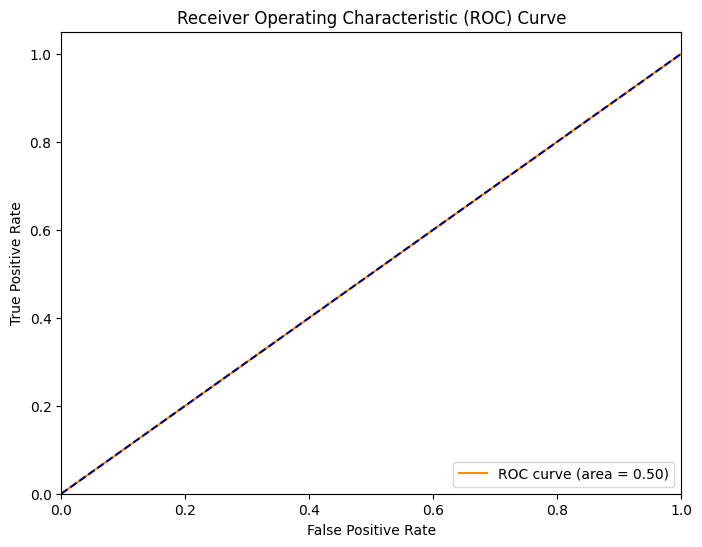

In [169]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [170]:
import optuna
from statsmodels.discrete.discrete_model import Probit, Logit
from statsmodels.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
import pandas as pd

# Assuming 'df' is your DataFrame and 'Target' is your target column

def optimize_model(trial):
    lagged_columns = [
        'US CPI Q %', 'US wholesale Q%', 'US_LT_INT', 'US_SR_INT', 'US_UNEMP_L',
        'US_INDPROD_C', 'US_HSTART_C', 'US_BUD_BAL_PCT_GDP', 'US_DEBT_L', 'US_EXP_L',
        'US_IMP_L', 'US_RTL_IND_L', 'US_FX_RS_L', 'US_HS_STARTS_L', 'Bentoil_L'
    ]
    
    # Choose the model type
    model_type = trial.suggest_categorical('model_type', ['Probit', 'Logit'])
    
    temp_df = df_weekly_interpolated_train.copy()
    for column in lagged_columns:
        lag = trial.suggest_int(f'{column}_lag', 1, 10)
        temp_df[f'{column}_lag{lag}'] = temp_df[column].shift(lag)
    
    temp_df.dropna(inplace=True)
    
    predictor_columns = [col for col in temp_df.columns if 'lag' in col]
    X = add_constant(temp_df[predictor_columns])
    y = temp_df['Target']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Fit the chosen model
    if model_type == 'Probit':
        model = Probit(y_train, X_train).fit(disp=0)
    elif model_type == 'Logit':
        model = Logit(y_train, X_train).fit(disp=0)
    
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.6).astype(int)
    
    recall = recall_score(y_test, y_pred)
    
    return recall

study = optuna.create_study(direction='maximize')
study.optimize(optimize_model, n_trials=100)

print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)


[I 2024-03-26 11:30:27,647] A new study created in memory with name: no-name-1a59158d-71f4-4ca0-9a8a-a9e151640c40
[I 2024-03-26 11:30:27,822] Trial 0 finished with value: 0.75 and parameters: {'model_type': 'Logit', 'US CPI Q %_lag': 10, 'US wholesale Q%_lag': 6, 'US_LT_INT_lag': 10, 'US_SR_INT_lag': 4, 'US_UNEMP_L_lag': 5, 'US_INDPROD_C_lag': 4, 'US_HSTART_C_lag': 9, 'US_BUD_BAL_PCT_GDP_lag': 1, 'US_DEBT_L_lag': 8, 'US_EXP_L_lag': 2, 'US_IMP_L_lag': 10, 'US_RTL_IND_L_lag': 1, 'US_FX_RS_L_lag': 8, 'US_HS_STARTS_L_lag': 3, 'Bentoil_L_lag': 6}. Best is trial 0 with value: 0.75.
[I 2024-03-26 11:30:27,965] Trial 1 finished with value: 0.75 and parameters: {'model_type': 'Probit', 'US CPI Q %_lag': 7, 'US wholesale Q%_lag': 8, 'US_LT_INT_lag': 3, 'US_SR_INT_lag': 2, 'US_UNEMP_L_lag': 3, 'US_INDPROD_C_lag': 5, 'US_HSTART_C_lag': 6, 'US_BUD_BAL_PCT_GDP_lag': 4, 'US_DEBT_L_lag': 7, 'US_EXP_L_lag': 1, 'US_IMP_L_lag': 2, 'US_RTL_IND_L_lag': 8, 'US_FX_RS_L_lag': 10, 'US_HS_STARTS_L_lag': 1, 'Ben

Number of finished trials: 100
Best trial: {'model_type': 'Logit', 'US CPI Q %_lag': 10, 'US wholesale Q%_lag': 3, 'US_LT_INT_lag': 8, 'US_SR_INT_lag': 9, 'US_UNEMP_L_lag': 9, 'US_INDPROD_C_lag': 6, 'US_HSTART_C_lag': 4, 'US_BUD_BAL_PCT_GDP_lag': 5, 'US_DEBT_L_lag': 10, 'US_EXP_L_lag': 7, 'US_IMP_L_lag': 6, 'US_RTL_IND_L_lag': 8, 'US_FX_RS_L_lag': 10, 'US_HS_STARTS_L_lag': 4, 'Bentoil_L_lag': 8}


In [179]:
# Assuming `study.best_trial.params` gives the optimal lag values

best_lags = study.best_trial.params
print("Best lags:", best_lags)

# Creating a new DataFrame to apply the best lag values
best_df = df_weekly_interpolated_train.copy()

# Applying the optimal lags for each predictor
for column in lagged_columns:
    lag = best_lags[f'{column}_lag']
    best_df[f'{column}_lag{lag}'] = best_df[column].shift(lag)

best_df.dropna(inplace=True)

# Selecting the new set of predictor columns
predictor_columns = [col for col in best_df.columns if 'lag' in col]

X = add_constant(best_df[predictor_columns])
y = best_df['Target']

# Splitting the dataset - You might want to use the same split or a different one for the final test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Fitting the Probit model with the best lag configuration
best_model = Logit(y_train, X_train).fit(disp=0)  # Suppressing output with disp=0

# Making predictions on the test set using the best model
y_pred_prob = best_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Adjust threshold as necessary

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy of the best model: {accuracy}')
print(f'Confusion Matrix of the best model:\n{conf_matrix}')


Best lags: {'model_type': 'Logit', 'US CPI Q %_lag': 10, 'US wholesale Q%_lag': 3, 'US_LT_INT_lag': 8, 'US_SR_INT_lag': 9, 'US_UNEMP_L_lag': 9, 'US_INDPROD_C_lag': 6, 'US_HSTART_C_lag': 4, 'US_BUD_BAL_PCT_GDP_lag': 5, 'US_DEBT_L_lag': 10, 'US_EXP_L_lag': 7, 'US_IMP_L_lag': 6, 'US_RTL_IND_L_lag': 8, 'US_FX_RS_L_lag': 10, 'US_HS_STARTS_L_lag': 4, 'Bentoil_L_lag': 8}
Accuracy of the best model: 0.7654320987654321
Confusion Matrix of the best model:
[[29 10]
 [ 9 33]]


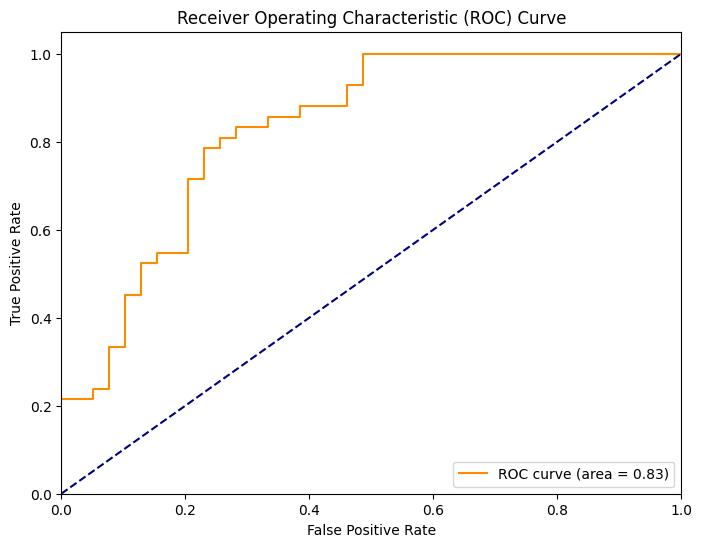

In [180]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [188]:
null_model = sm.Logit(y_train, sm.add_constant(X_train.iloc[:,0]*1)).fit(disp=100)
full_ll = model.llf
null_ll = null_model.llf
mcFadden_R2 = 1 - (full_ll / null_ll)
print(f"McFadden's R^2: {mcFadden_R2}")


Optimization terminated successfully.
         Current function value: 0.691957
         Iterations 3
McFadden's R^2: 0.7210689215063295
